 ## 彩色图像的频域滤波器

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, img_as_float, color
from PIL import Image
%matplotlib inline

def GaussLowPassFiltering(f_shift, r=50):  
    # 初始化  
    m = f_shift.shape[0]  
    n = f_shift.shape[1]  
    h1 = np.zeros((m, n))  
    x0 = np.floor(m/2)  
    y0 = np.floor(n/2)  
    for i in range(m):  
        for j in range(n):  
            D = np.sqrt((i - x0)**2 + (j - y0)**2)  
            h1[i][j] = np.exp((-1)*D**2/2/(r**2))  
    result = np.multiply(f_shift, h1)  
    return result  

# 中文显示工具函数
def set_ch():
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong']
    mpl.rcParams['axes.unicode_minus'] = False
    

In [86]:
set_ch()
lena_src = np.array(Image.open(r'E:\digital_image_process\color_images\Lena.jpg'))

def frequency_filter(img, r_s = [5, 20, 50, 80, 250]):
    for r in r_s:
        ret_img = np.zeros(img.shape, dtype='uint8')
        fchannels = []
        fimg_channels = []
        tmp = np.zeros((img.shape[0],img.shape[1]),dtype=img.dtype)
        for i in range(img.shape[-1]):
            tmp[:,:] = img[:,:,i]
            img_dft = np.fft.fft2(tmp)
            img_dft_shift = np.fft.fftshift(img_dft)
            # 计算滤波结果
            fshift = GaussLowPassFiltering(img_dft_shift, r=r)
            fimg = np.log(np.abs(fshift))
            fimg_channels.append(fimg)
            # 逆傅里叶变换
            f_ishift = np.fft.ifftshift(fshift)
            img_back = np.fft.ifft2(f_ishift)
            # 出来的是负数形式
            #取绝对值：将复数变化成实数
            img_back = np.uint8(np.abs(img_back))
            fchannels.append(img_back)
        ret_img = cv2.merge(fchannels)
        ret_fimg = cv2.merge(fimg_channels)
    #     return ret_img, ret_fimg
    #         result, fimg = frequency_filter(lena_src, radius=r)
        plt.subplot(1, 2, 1), plt.axis('off'),plt.imshow(ret_img), plt.title('空域r='+ str(r), fontsize='15', fontweight='bold')
        plt.subplot(1, 2, 2), plt.axis('off'),plt.imshow(ret_fimg), plt.title('频域r='+ str(r), fontsize='15', fontweight='bold')
        plt.savefig(r"E:\digital_image_process\experiment_1\work1_result\高斯低通滤波r" + str(r))
        plt.show()
    # plt.savefig(r"E:\digital_image_process\experiment_1\work1_result\高斯低通滤波r")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


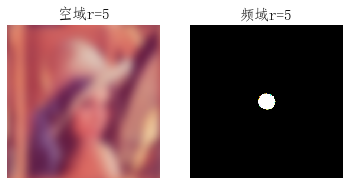

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


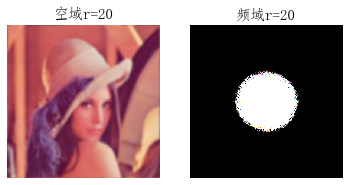

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


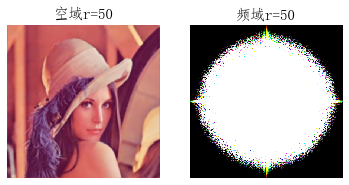

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


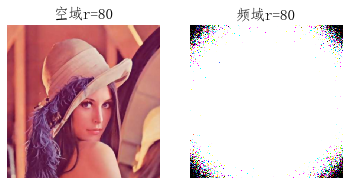

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


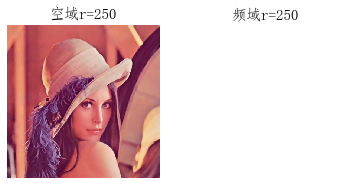

In [87]:
frequency_filter(lena_src)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


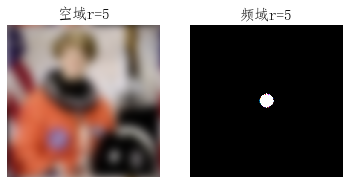

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


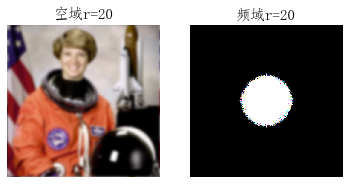

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


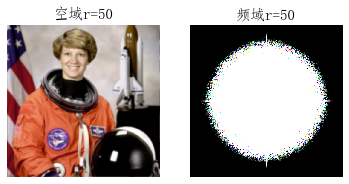

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


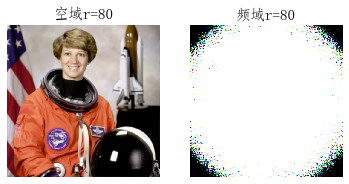

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


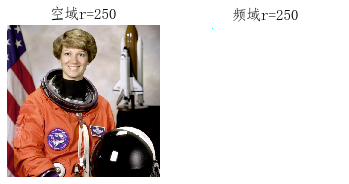

In [88]:
frequency_filter(data.astronaut())

In [95]:
# 高通滤波
def GaussHighPassFiltering(f_shift, r=50):  
    # 初始化  
    m = f_shift.shape[0]  
    n = f_shift.shape[1]  
    h1 = np.zeros((m, n))  
    x0 = np.floor(m/2)  
    y0 = np.floor(n/2)  
    for i in range(m):  
        for j in range(n):  
            D = np.sqrt((i - x0)**2 + (j - y0)**2)  
            h1[i][j] = np.exp((-1)*D**2/2/(r**2))  
    h1 = 1 - h1
    result = np.multiply(f_shift, h1)  
    return result  

def frequency_filter_2(img,r_s = [5, 20, 50, 80, 250]):
    for r in r_s:
        ret_img = np.zeros(img.shape, dtype='uint8')
        fchannels = []
        fimg_channels = []
        tmp = np.zeros((img.shape[0],img.shape[1]),dtype=img.dtype)
        for i in range(img.shape[-1]):
            tmp[:,:] = img[:,:,i]
            img_dft = np.fft.fft2(tmp)
            img_dft_shift = np.fft.fftshift(img_dft)
            # 计算滤波结果
            fshift = GaussHighPassFiltering(img_dft_shift, r=r)
            fimg = np.log(np.abs(fshift))
            fimg_channels.append(fimg)
            # 逆傅里叶变换
            f_ishift = np.fft.ifftshift(fshift)
            img_back = np.fft.ifft2(f_ishift)
            # 出来的是负数形式
            #取绝对值：将复数变化成实数
            img_back = np.uint8(np.abs(img_back))
            fchannels.append(img_back)
        ret_img = cv2.merge(fchannels)
        ret_fimg = cv2.merge(fimg_channels)
        plt.subplot(1, 2, 1), plt.axis('off'),plt.imshow(ret_img), plt.title('空域r='+ str(r), fontsize='20', fontweight='bold')
        plt.subplot(1, 2, 2), plt.axis('off'),plt.imshow(ret_fimg), plt.title('频域r='+ str(r), fontsize='20', fontweight='bold')
        plt.savefig(r"E:\digital_image_process\experiment_1\work1_result\高斯高通滤波r" + str(r) + ".jpg")
        plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


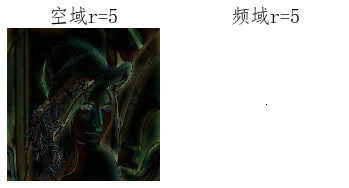

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


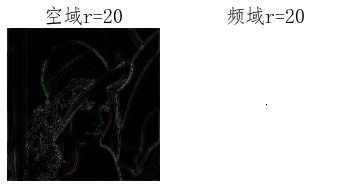

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


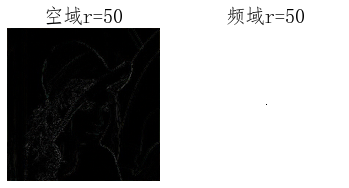

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


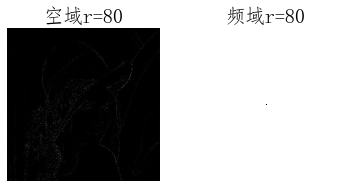

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


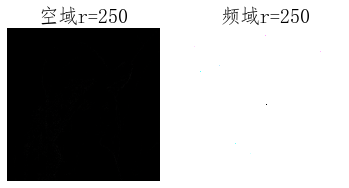

In [93]:
frequency_filter_2(lena_src)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


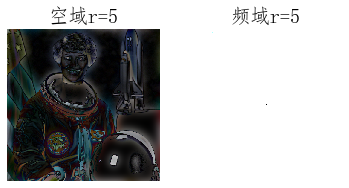

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


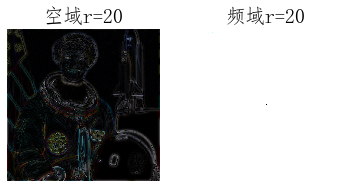

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


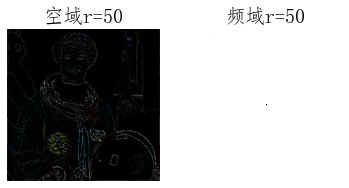

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


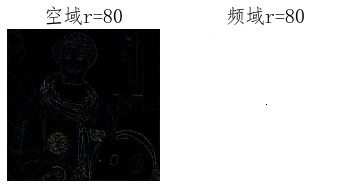

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


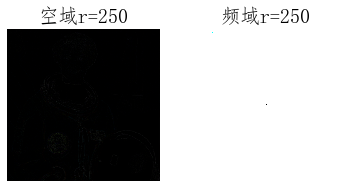

In [96]:
frequency_filter_2(data.astronaut())

## 灰度和彩色图像的快速傅立叶变换

In [24]:
def gray_fft(img):
    #将空域转化为频域
    set_ch()
#     img = data.camera()
    # 快速傅里叶变换得到频率分布
    f = np.fft.fft2(img)
    # 默认结果中心点的位置是左上角，转移到中间位置
    fshift = np.fft.fftshift(f)
    # fft结果是复数，求绝对值结果才是振幅
    fimg = np.log(np.abs(fshift))
    # 逆变换
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.uint8(np.abs(img_back))
    # 展示结果
    plt.subplot(1, 3, 1), plt.imshow(img, 'gray'),plt.axis('off'), plt.title('原始图像')
    plt.subplot(1, 3, 2), plt.imshow(fimg, 'gray'),plt.axis('off'), plt.title('傅里叶频谱')
    plt.subplot(1, 3, 3), plt.imshow(img_back, 'gray'),plt.axis('off'), plt.title('逆变换')
#     plt.savefig(r"E:\digital_image_process\experiment_1\work2_result\" + "1" + ".jpg")
    plt.show()

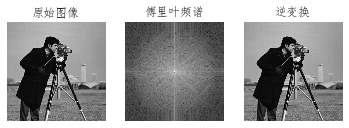

In [25]:
gray_fft(data.camera())

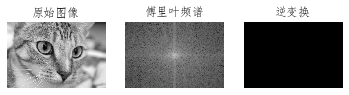

In [101]:
image = color.rgb2gray(img_as_float(data.chelsea()))
gray_fft(image)

In [48]:
def rgb_ttf(img):
    set_ch()
    ret_img = np.zeros(img.shape, dtype='uint8')
    fchannels = []
    fimg_channels = []
    tmp = np.zeros((img.shape[0],img.shape[1]),dtype=img.dtype)
    for i in range(img.shape[-1]):
        tmp[:,:] = img[:,:,i]
        # 快速傅里叶变换得到频率分布
        f = np.fft.fft2(tmp)
        # 默认结果中心点的位置是左上角，转移到中间位置
        fshift = np.fft.fftshift(f)
        # fft结果是复数，求绝对值结果才是振幅
        fimg = np.log(np.abs(fshift))
        fimg_channels.append(fimg)
        # 逆变换
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.uint8(np.abs(img_back))
        fchannels.append(img_back)
    ret_img = cv2.merge(fchannels)
    ret_fimg = cv2.merge(fimg_channels)
    # 展示结果
    plt.subplot(1, 3, 1), plt.imshow(img),plt.axis('off'), plt.title('原始图像')
    plt.subplot(1, 3, 2), plt.imshow(fimg),plt.axis('off'), plt.title('傅里叶频谱')
    plt.subplot(1, 3, 3), plt.imshow(ret_img),plt.axis('off'), plt.title('逆变换')
    plt.show()

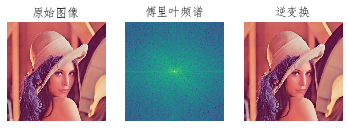

In [49]:
rgb_ttf(lena_src)

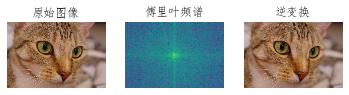

In [98]:
rgb_ttf(data.chelsea())

## 灰度和彩色图像的离散余弦变换

In [62]:
def gray2DCT(img):
    height, width = img.shape
    hdata = np.vsplit(img, height // 8)

    f_patches = []
    fi_patches = []

    for i in range(height // 8):
        wdata = np.hsplit(hdata[i], width // 8)

        f_patch = []
        fi_patch = []
        for j in range(width // 8):
            # DCT变换
            dct_patch = cv2.dct(wdata[j].astype(np.float))
            f_patch.append(dct_patch)
            # DCT逆变换
            idct_patch = cv2.idct(dct_patch)
            fi_patch.append(idct_patch)

        f_patchs = np.hstack(f_patch)
        f_patches.append(f_patchs)

        fi_patchs = np.hstack(fi_patch)
        fi_patches.append(fi_patchs)

    dct_image = np.vstack(f_patches)
    black_image = np.vstack(fi_patches).astype(np.uint8)
    plt.subplot(1, 3, 1), plt.imshow(img, 'gray'),plt.axis('off'), plt.title('原始图像')
    plt.subplot(1, 3, 2), plt.imshow(dct_image,'gray'),plt.axis('off'), plt.title('频谱图')
    plt.subplot(1, 3, 3), plt.imshow(black_image, 'gray'),plt.axis('off'), plt.title('逆变换')
    plt.show()

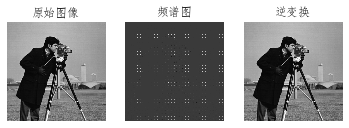

In [105]:
gray2DCT(data.camera())

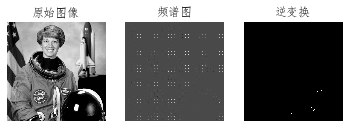

In [106]:
image = color.rgb2gray(img_as_float(data.astronaut()))
gray2DCT(image)

In [75]:
def rgb2DCT(img):
    fchannels = []
    dimg = []
    dimg_channels = []
    tmp = np.zeros((img.shape[0],img.shape[1]),dtype=img.dtype)
    for k in range(img.shape[-1]):
        tmp[:,:] = img[:,:,k]
        
        
        height, width = img.shape[0], img.shape[1]
        hdata = np.vsplit(tmp, height // 8)

        f_patches = []
        fi_patches = []

        for i in range(height // 8):
            wdata = np.hsplit(hdata[i], width // 8)

            f_patch = []
            fi_patch = []
            for j in range(width // 8):
                # DCT变换
                dct_patch = cv2.dct(wdata[j].astype(np.float))
                f_patch.append(dct_patch)
                # DCT逆变换
                idct_patch = cv2.idct(dct_patch)
                fi_patch.append(idct_patch)

            f_patchs = np.hstack(f_patch)
            f_patches.append(f_patchs)

            fi_patchs = np.hstack(fi_patch)
            fi_patches.append(fi_patchs)

        dct_image = np.vstack(f_patches)
        black_image = np.vstack(fi_patches).astype(np.uint8)
        dimg.append(dct_image)
        dimg_channels.append(black_image)
    dct_image = np.moveaxis(dimg, 0, 2)
    rgb_image = np.moveaxis(dimg_channels, 0, 2)
    plt.subplot(1, 3, 1), plt.imshow(img),plt.axis('off'), plt.title('原始图像')
    plt.subplot(1, 3, 2), plt.imshow(dct_image),plt.axis('off'), plt.title('频谱图')
    plt.subplot(1, 3, 3), plt.imshow(rgb_image),plt.axis('off'), plt.title('逆变换')
    plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


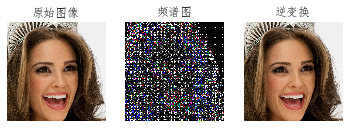

In [109]:
rgb2DCT(pic)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


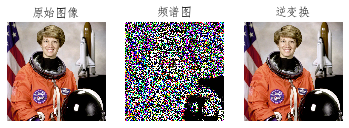

In [107]:
rgb2DCT(data.astronaut())